### Approach break down & Analysis
In this project, 6 functions were created to complete the project. During the first period of the project, I first did research on how to draw rectangles and how to find the maximum rectangle that does not overlap with others. After some careful thinking, I decided to use nested for loops to find all the possible rectangles within the new random rectangle while using bitmap to keep track of the area that has already been filled.

##### Function 1: count_rec(row_start,row_end,col_start,col_end)
On the bitmap, each cell represents an one by one square. The shape of each new rectangle will be presented by cell indices, which will be passed to this function to calculate all the possible rectanges within the new rectangle. For exmaple, count_rec(0,1,0,1) means starting at (0,0), caculate the coordinates of all the possible rectangels within a two by two square.

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import numpy as np

'''
the function will return a list that contains the coordinates of all the possible rectangles within the new rectangle
'''
def count_rec(row_start,row_end,col_start,col_end):
    target = [] 
    for row1 in range(row_start,row_end+1):
        for col1 in range(col_start,col_end+1):
            for row2 in range(row1,row_end+1):
                for col2 in range(col1,col_end+1):
                    target.append([row1, row2, col1, col2])
    return target 

##### Function 2: check_overlap(target)
This function will iterate through the list of the coordinates of all the possible rectangles within the new rectangle generated by the previous function and return a list of coordinates of those rectangles which are not overlapping with others.

In [14]:
'''
1. initiate the returning list with zero elments, compare the bitmap cells with the region enclosed by the rectangle
2. if there are cells that already marked as 1, then the rectangle is overlapping
3. return the coordinates of all the nonoverlapping rectangles
4. if all the possible rectangles are overlapping, return an empty list
'''
def check_overlap(target):
    valid_target = []
    for coordinate in target:
        occupied = np.any(tracking_map[coordinate[0]:(coordinate[1] + 1), coordinate[2]:(coordinate[3] + 1)] == 1)
        if occupied == False:
            valid_target.append(coordinate)
    return valid_target

##### Function 3: max_rec(valid_target):
Using the list of coordinates of all nonoverlapping rectangles generated by the previous function, this function will find the rectangle that has the largest area and return its coordinates.

In [15]:
'''
Using the coordinate of each rectangle to calculate area and find the one that has the largest area. 
If the list valid_target is empty, simply return; Else return the coordinate of the maximum rectangle
'''
def max_rec(valid_target):
    maxArea = 0
    goal_rec = [0,0,0,0]
    if not valid_target:
        return
    else:
        for coordinate in valid_target:
            tmp_maxArea = (int(coordinate[1]) + 1 - int(coordinate[0])) * (int(coordinate[3]) + 1 - int(coordinate[2])) 
            if tmp_maxArea > maxArea:
                maxArea = tmp_maxArea
                goal_rec[0] = coordinate[0]
                goal_rec[1] = coordinate[1]
                goal_rec[2] = coordinate[2]
                goal_rec[3] = coordinate[3]
        return goal_rec

##### Function 4: update_trackingMap(goal_rec):
The previous function will return the coordinate of the largest nonoverlapping rectangle. This function will update the bitmap cells corresponding to the region enclosed by the rectangle.

In [17]:
'''
Cells in the tracking map are first initialized with 0, meaning empty. After the region is filled, the corresponding cell
will be marked with 1
'''
def update_trackingMap(goal_rec):
    for row in range(goal_rec[0], goal_rec[1] + 1):
        for col in range(goal_rec[2], goal_rec[3] + 1):
            if tracking_map[row][col] == 0:
                tracking_map[row][col] = 1

##### Function 5: return_rec(row_start,row_end,col_start,col_end):
In this function, count_rec and check_overlap will be called to generate the rectangle coordinate that qualifies all the requirements.

In [18]:
def return_rec(row_start,row_end,col_start,col_end):
    possibleRectangles = count_rec(row_start,row_end,col_start,col_end)
    validRectangles = check_overlap(possibleRectangles)
    return max_rec(validRectangles)

##### Function 6: draw_rec(width,height):
In this function, qualified rectangles will be visualized with different colors. The width and the height of the footprint is given by the user.  

In [84]:
'''
Inside of this function, every new rectangle's row and column coordinate are generated randomly. The row coordinate 
ranges from lower value to higher value and the column coordinate is organized in the same manner. With the row and column
coordinate, it is able to calculate each rectangle's width and height for plotting purposes. The function will only plot
if a valid coordinate is returned from return_rec().
'''
def draw_rec(width,height):    
    row_start = random.randint(0, height-1)
    row_end = random.randint(0, height-1)
    col_start = random.randint(0, width-1)
    col_end = random.randint(0, width-1)
    if row_start > row_end:
        tmp = row_start
        row_start = row_end
        row_end = tmp
    if col_start > col_end:
        tmp = col_start
        row_start = col_end
        col_end = tmp
    final_coordinate = return_rec(row_start,row_end,col_start,col_end)
    #print(final_coordinate)
    if final_coordinate is not None:
        global numOfValidRecs
        numOfValidRecs = numOfValidRecs + 1
        update_trackingMap(final_coordinate)
        x = final_coordinate[0]
        y = final_coordinate[2]
        a = final_coordinate[1]-final_coordinate[0]+1
        b = final_coordinate[3]-final_coordinate[2]+1
        #%matplotlib inline
        ax1 = fig1.add_subplot(111, aspect='equal')
        ax1.add_patch(patches.Rectangle((x, y),a,b,alpha=0.6,facecolor='#%06x' % random.randint(0, 0xFFFFFF)))
        plt.ylim(0,height)
        plt.xlim(0,width)

##### Executing all functions:
Users will input the width and the height of the footprint. The code below call draw_rec() until the footprint is filled. The bitmap is initiated before draw_rec() is called.

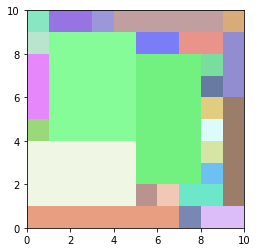

In [87]:
fig1 = plt.figure()
width = 10
height = 10
historyNum = []
#for i in range(50):
numOfValidRecs = 0
tracking_map = np.zeros((height, width), dtype=int)
while np.any(tracking_map[:, :] == 0):
    draw_rec(width,height)
historyNum.append(numOfValidRecs)

##### Executing all functions:
Users will input the width and the height of the footprint, and the number of towers they wish to put down. The bitmap is initiated before draw_rec() is called. The percentage of coverage will be shown.

33

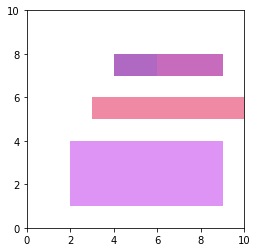

In [115]:
fig1 = plt.figure()
width = 10
height = 10
tracking_map = np.zeros((height, width), dtype=int)
for i in range(5):
    draw_rec(width,height)
np.count_nonzero(tracking_map)